#### 모델링 : 함수 찾기
- 머신러닝할때 해봤음
- 집의 평수를 알면가격을 알 수 있을까?
- Y = aX + b
- 데이터를 잘 설명하는 직선 하나를 찾는 것이 모델링

##### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 1인지 맞출 수 있을까?
- 아주 복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정

##### ANN 인공신경망
- 단일층 : 신경망이 1개 -> 퍼셉트론 ( 1X1 -> 뉴런)


#### 활성화 함수
- 계단함수
- 시그모이드 : 연속적인 값을 출력 - 미분이 가능 - 오차 역전파
- 활성화 함수가 없다...f(z) = z
- y = (W100 x ..... W1)ㅌ  --> 거대한 1층짜리 선형모델
- 초기 활성화 함수 스위치
    - 계단함수 if x > 0 1
                x <= 0

- 시그모이드

#### 다층신경망 : MLP 퍼셉트론을 여러개 쌓아서 올린구조
- imput layer :  데이터가 들어오는 곳 (뉴런 수 데이터의 특성 28 x 28  = 784)
- hidden layer : 입력과 출력 사이에 있는 레이어

In [4]:
%pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# X,y = fetch_openml('mnist_784',version=1 ,return_X_y=True, parser='auto')

In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,))

In [7]:
np.unique(y_train , return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

5


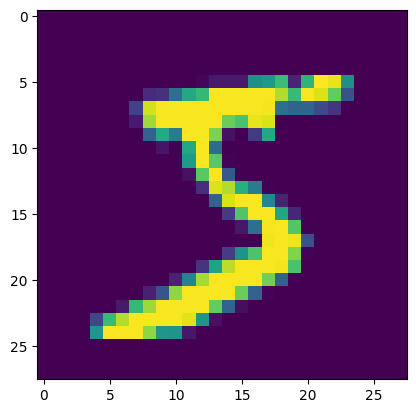

In [9]:
print(y_train[0])
plt.imshow(x_train[0])

In [ ]:
print(y_train[20])
plt.imshow(x_train[20],cmap='gray')
print(x_train[20])

In [13]:
# 실수 / 실수 = 실수 나오게끔 스케일링
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



- 정답 종류 클래스
#### 소프트 맥스 - 전체 클래스 중에서 하나 선택 - 전체 10개 중에서 정답이 1개일경우
- 확률 잔체 클래스에 대해서 0 ~ 1 다 합치면 1 되는 구조

#### 시그모이드 - 다중 클래스 - 전체 클래스 중에서 정답이 여러개일경우
- 각 클래스에 대해서 확률을 0 ~ 1 사이로 변환 0.8  0.9  0.1

In [ ]:
# 이 층을 어떻게 나누느냐에 따라 성능이 달라짐
# 층 사이에 무언가를 해둘 수 있음
model = tf.keras.Sequential([
    # 1층 입력층 28 x 28 2D  --> 784  1D
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 2층 은닉층 
    tf.keras.layers.Dense(128 , activation = 'relu'),
    # 출력층
    tf.keras.layers.Dense(10 , activation = 'sigmoid')
])
# 레이어가 아무리 복잡해도 자동으로 미분 계산·가중치 업데이트를 처리해주는 똑똑한 시스템
model.summary()

d:\pandas_main\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer = 'adam', # 빠르고 안정적인
    loss = 'sparse_categorical_crossentropy',
    metrics = [ 'accuracy' ]
)

In [29]:
history = model.fit(
    x_train,
    y_train,
    epochs = 20,
    validation_data = (x_test, y_test),
    verbose = 1 # 로그 출력
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9283 - loss: 0.2551 - val_accuracy: 0.9559 - val_loss: 0.1503
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1145 - val_accuracy: 0.9686 - val_loss: 0.1019
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0786 - val_accuracy: 0.9757 - val_loss: 0.0832
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0590 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0448 - val_accuracy: 0.9761 - val_loss: 0.0806
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9890 - loss: 0.0360 - val_accuracy: 0.9754 - val_loss: 0.0798
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9772 - val_loss: 0.0753
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0212 - 

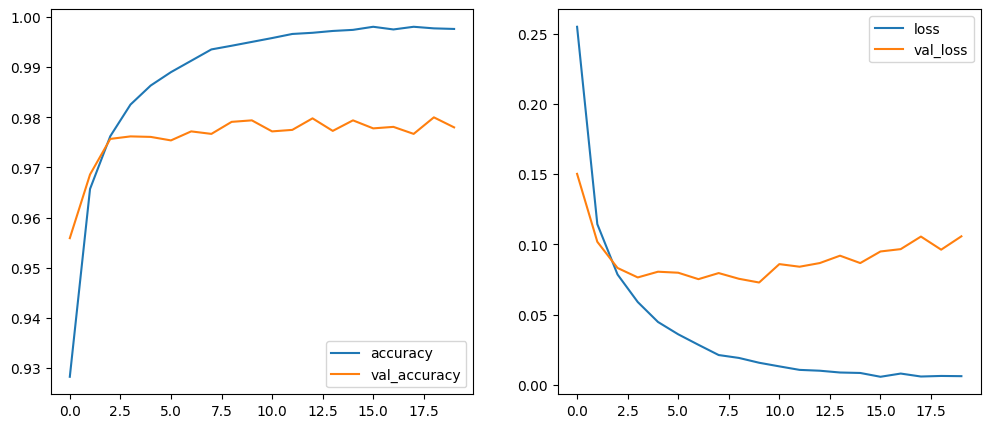

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# 📈 정확도 그래프
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

# 📉 손실 그래프
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.show()


In [31]:
pred = model.predict(x_test)
pred[10], y_test[10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step


(array([1.0000000e+00, 7.3020012e-10, 9.3326537e-04, 1.1663574e-10,
        1.1456429e-18, 6.8895747e-06, 1.4688974e-03, 1.8266639e-06,
        8.2980125e-12, 5.4902430e-06], dtype=float32),
 np.uint8(0))

In [32]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.1058


[0.10577903687953949, 0.9779999852180481]

In [34]:
pred.shape

(10000, 10)

In [36]:
np.argmax(pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

